In [1]:
import numpy as np
class Perceptron(object):

    def __init__(self, lr=0.01, n_iter=10):
        """构造器
        
        参数
        ----------
        lr : float
            学习率
        n_iter : int
            迭代多少次之后算法应该停止
        """
        self.lr = lr
        self.n_iter = n_iter
        
    def predict(self, X):
        """预测目标标签
        
        参数
        ----------
        X : array-like
            数据样本, <n_samples x n_features>
            
        Returns
        -------
        返回目标标签, +1 or -1.
        
        Notes
        -----
        Must run `fit` first.
        """
        # Whenever the term (X * weights + bias) >= 0, we return
        # label +1, else we return label -1
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0,
                        1, -1)
        
    def fit(self, X, y):
        """根据数据拟合模型
        
        参数
        ----------
        X : array-like
            数据样本, <n_samples x n_features>
        y : array-like
            目标标签, <n_samples x 1>
        """
        self.weights = np.zeros(X.shape[1])  # 权重数组
        self.bias = 0.0  # 偏置项
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta

## 生成一个玩具数据集

使用scikit-learn的make_blobs函数，生成属于其中一个团块（centers）的100个数据样本（n_samples）：

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2.2, random_state=42)

感知器分类器期望的目标标签要么是+1，要么是–1，而make_blobs返回0和1。调整标签的一种简单方式如下所示：

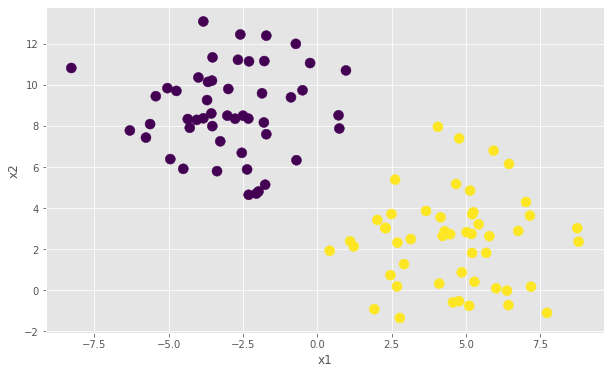

In [3]:
y = 2 * y - 1
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y);
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('perceptron-data.png')

## 拟合感知器和数据

In [4]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)
p.weights, p.bias

(array([ 2.20091094, -0.4798926 ]), 0.2)

如果把这些值插入我们的方程φ，那么很明显感知器学习了一个决策边界，形式为2.2(x1)–0.48(x2) + 0.2 ≥ 0。

## 评估感知器分类器

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X), y)

1.0

Text(0, 0.5, 'x2')

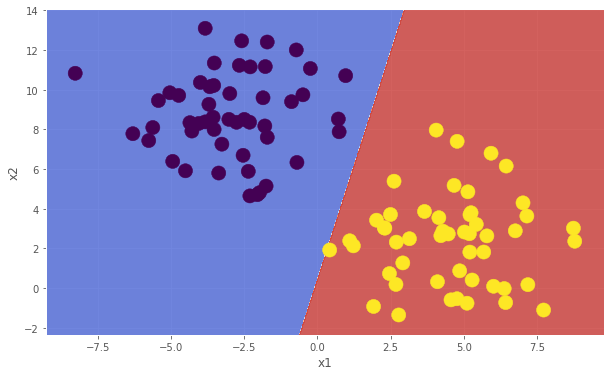

In [6]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

## 将感知器应用于非线性可分的数据

通过增加玩具数据集的两个团块的散布（cluster_std）来测试一下，这样两个团块开始重叠：

Text(0, 0.5, 'x2')

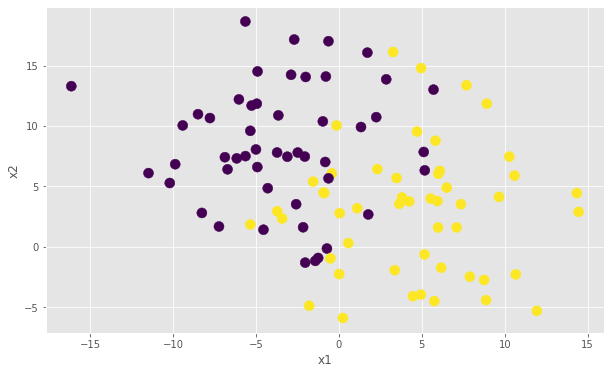

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=5.2, random_state=42)
y = 2 * y - 1

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y);
plt.xlabel('x1')
plt.ylabel('x2')

该数据不再线性可分，因为没有直线完美地分离这两个团块。

In [8]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)
accuracy_score(p.predict(X), y)

0.81

Text(0, 0.5, 'x2')

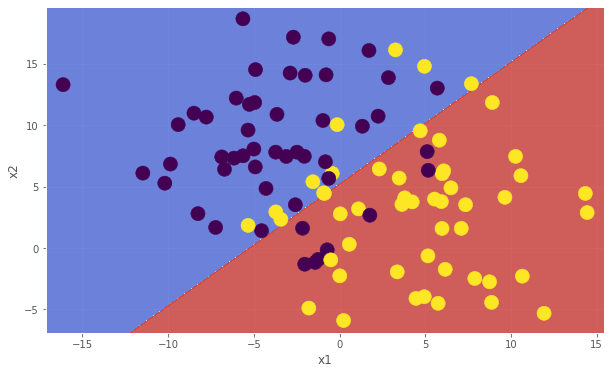

In [9]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')